## Rod Cantilever Example

In [14]:
import numpy as np

import dismech

b = 0.02
h = 0.001

geom = dismech.GeomParams(rod_r0=0.001,
                          shell_h=0,
                          axs=b*h,
                          ixs1=b*h**3/12,
                          ixs2=h*b**3/12,
                          jxs=b*h**3/6)

material = dismech.Material(density=1200,
                            youngs_rod=2e6,
                            youngs_shell=0,
                            poisson_rod=0.5,
                            poisson_shell=0)

static_2d_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=True,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=False,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-2,
                                  max_iter=50,
                                  total_time=1.0,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
#env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
env.add_force('selfContact', delta=1e-5, h=2e-3)
#env.set_static()   

geo = dismech.Geometry.from_txt('input.txt')

robot = dismech.SoftRobot(geom, material, geo, static_2d_sim, env)

u = robot.state.u
u[8] = -0.1
u[11] = -0.1

### Time Stepping

As we are performing a static simulation, we must change gravity for each time step.

In [15]:
stepper = dismech.ImplicitEulerTimeStepper(robot)

robots = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])

delta: 0.005
h: 1.0
K1: 2999.9999999999995
scale:  500.0
upper limit for quadratic: 1.995
upper limit for smooth: 2.005
(1, 4, 3)
12000.0
current_time:  0.01
(1, 4, 3)
12000.000000000011
current_time:  0.02
(1, 4, 3)
12000.000000000011
current_time:  0.03
(1, 4, 3)
12000.000000000011
current_time:  0.04
(1, 4, 3)
12000.000000000011
current_time:  0.05
(1, 4, 3)
12000.000000000011
current_time:  0.06
(1, 4, 3)
12000.000000000011
current_time:  0.07
(1, 4, 3)
12000.000000000011
current_time:  0.08
(1, 4, 3)
12000.000000000011
current_time:  0.09
(1, 4, 3)
12000.000000000011
current_time:  0.1
(1, 4, 3)
12000.000000000011
current_time:  0.11
(1, 4, 3)
12000.000000000011
current_time:  0.12
(1, 4, 3)
12000.000000000011
current_time:  0.13
(1, 4, 3)
12000.000000000011
current_time:  0.14
(1, 4, 3)
12000.000000000011
current_time:  0.15
(1, 4, 3)
12000.000000000011
current_time:  0.16
(1, 4, 3)
12000.000000000011
current_time:  0.17
(1, 4, 3)
12000.000000000011
current_time:  0.18
(1, 4, 3)


In [16]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Rod Cantilever (N=51)')

fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

100


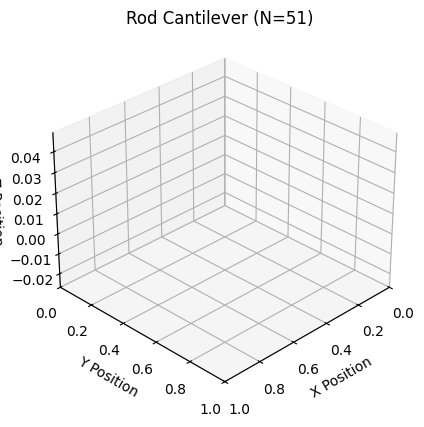

In [17]:
ani = dismech.get_animation(robot, t, qs, options)
ani.save('1e-5.gif')